# Otimizacao_Metaheuristica
<h2> Informações</h2>
Centro Federal de Educação Tecnológia Celso Suckow da Fonseca (CEFET/RJ)<br />
Trabalho da Disciplina: Otimização por Metaurísticas - Semestre 2022/02<br />

Artigo Base:
The Knapsack Problem with Forfeits
Cerulli, R., D’Ambrosio, C., Raiconi, A., Vitale, G. (2020). The Knapsack Problem with Forfeits. In: Baïou, M., Gendron, B., Günlük, O., Mahjoub, A.R. (eds) Combinatorial Optimization. ISCO 2020. Lecture Notes in Computer Science(), vol 12176. Springer, Cham. https://doi.org/10.1007/978-3-030-53262-8_22

<h2> Ações</h2><br/>

- [x] Viabilização de Instâncias
- [x] Algoritmos Construtivos (Guloso, Semi-Guloso, Aleatório)
- [X] Ajuste Algoritmo Construtivo com Penalidades
- [X] Algoritmo com Busca Local
- [X] Framework GRASP
- [X] Framework ILS
- [X] Framework VNS
- [X] Simulated Annealing
- [X] Execução: 10x para cada Instância
- [X] Reportar Tabela: Melhor Solução
- [X] Reportar Tabela: Média da Solução
- [X] Reportar Tabela: Média do Tempo
- [X] Reportar Tabela: Coeficiente/Desvio de Variação das Soluções
- [X] Reportar Tabela: Coeficiente de Variação do Tempo

        

<h3>Classe para Leitura das Instâncias


In [2]:
import sys
import time
import numpy as np



class Instance:
    def __init__(self, filename):

        path = f"{filename}"

        f = open(path, "r")

        self.num_items, self.num_forfeits_pairs, self.budget = map(
            int, f.readline().split(" ")
        )

        f.close()

        # items definition
        items = []
        for i in range(self.num_items):
            items.append(i)

        self.items = np.array(items)

        line_counter = 1

        self.profits = np.loadtxt(
            path, delimiter=" ", skiprows=line_counter, max_rows=1
        )
        line_counter += 1

        self.weights = np.loadtxt(
            path, delimiter=" ", skiprows=line_counter, max_rows=1
        )
        line_counter += 1

        max = 2 * self.num_forfeits_pairs

        self.forfeit_cost_and_forfeits_pairs = np.loadtxt(
            path, delimiter=" ", skiprows=line_counter, max_rows=max, usecols=(0, 1)
        ).tolist()

        self.forfeits_costs = [
            v for i, v in enumerate(self.forfeit_cost_and_forfeits_pairs) if i % 2 == 0
        ]

        self.forfeits_pairs = [
            v for i, v in enumerate(self.forfeit_cost_and_forfeits_pairs) if i % 2 != 0
        ]

        # remove the first element of the sublist
        for i in range(len(self.forfeits_costs)):
            self.forfeits_costs[i].pop(0)

        # transform list of lists into a single list - flatten
        self.forfeits_costs = [
            item for sublist in self.forfeits_costs for item in sublist
        ]

        self.forfeits_costs = np.array(self.forfeits_costs)
        self.forfeits_pairs = np.array(self.forfeits_pairs)      

<h2>Montando a Matriz de Penalidades


In [3]:
def calculate_penalty(items,forfeits_pairs, forfeits_costs):
    mD=np.zeros((int(len(items)),int(len(items))))       
    
    for index, pair in enumerate(forfeits_pairs):
        mD[int(pair[0]),int(pair[1])]=forfeits_costs[index]                
    return mD

#with np.printoptions(edgeitems=500):
#    print(problem_instance.forfeits_pairs)

<h2>Funções Auxiliares 

<h3>Função para Cálculo do Lucro dos itens constantes como solução(incluídos na mochila)

In [4]:
def get_solution_cost(solution, profits, forfeits_pairs_set, mD) -> int:
    cost = 0    
    for item in solution:
        cost += profits[item]        
    #print(f"Custo antes da Penalização: {cost}")
    for i in solution:
        for j in solution:
            if i > j:
                if (i, j) in forfeits_pairs_set or (j,i) in forfeits_pairs_set:
                    cost = cost - mD[i][j]
                        #print(f"{(i,j)} - Custo {mD[i][j]}")
    #print(f"Custo Depois da Penalização: {cost}")
    return cost

<h3> Função Para Cálculo da Capacidade Ocupada da Mochila

In [5]:
def calcb(solution, w):
    bres = 0
    for sol in solution:
        sol=int(sol)
        bres = bres + int(w[sol])
    return bres

<h1>Algoritmo Construtivo (Guloso, Aleatório e Semi-Guloso)</h1>

Guloso => Alpha=0 </br>
Aleatório => Alpha=1

In [6]:
import random as rd
import copy
def greedyalgorithm(items, weights, profits, budget, forfeits, forfeits_costs, alpha,mD):    

    
    forfeits_pairs_set={tuple(x) for x in problem_instance.forfeits_pairs}    
    
    cap=copy.deepcopy(budget)
    remaining_items = copy.deepcopy(items)
    #print(sorted_items)    
    solution=[]
    scost=[]
    #sweights=[]
    cost=0
    index=0
    
    if alpha ==1:  # totalmente aleatório 
        #remaining_items=zip(items,weights,profits)
        sorted_items=sorted(remaining_items, key= lambda x:profits[x]/(weights[x]+1), reverse=True)
        #sorted_items=sorted(remaining_items, key= lambda x:(profits[x]-sum(mD[x][solution]))/(weights[x]+1), reverse=True)
        #print(tuple(items))        
        
        rd_index=rd.choice(range(0,len(sorted_items))) 
        candidate=sorted_items[rd_index]
        
        while cap-weights[candidate]>0:                                        
                cap=cap-weights[candidate]
                solution.append(candidate) 
                
                
                penalidade=sum(mD[candidate][solution])                
                #if penalidade>0: print(f"Penalidade do Item {sorted_items[rd_index][0]} é {penalidade}")
                    
                cost=cost+profits[candidate]-penalidade
                
                scost.append(profits[candidate]-penalidade)
                
                #sweights.append(weights[candidate])
                
                sorted_items.remove(sorted_items[rd_index])
                
                if len(sorted_items)>=0:
                    rd_index=rd.choice(range(0,len(sorted_items)))  
                    candidate=sorted_items[rd_index]
                else:
                    break;
        
                    
    else:
            if alpha == 0: #totalmente guloso
                
                #sorted_items=sorted(remaining_items, key= lambda x:profits[x]/(weights[x]+1), reverse=True)
                sorted_items=sorted(remaining_items, key= lambda x:(profits[x]-sum(mD[x][solution]))/(weights[x]+1), reverse=True)
                
                candidate=sorted_items[0]
                while cap-weights[candidate]>0:                                                  
                    
                    #calcula a nova penalidade para o item a ser inserido no conjunto e reordena                                      
                                                          
                    
                    cap=cap-weights[candidate]
                    solution.append(candidate)  
                    
                    penalidade=sum(mD[candidate][solution])                
                   
                    
                  
                    cost=cost+profits[candidate]-penalidade
                    #cost=cost+sorted_items[index][2]-sum(mD[sorted_items[index][0]][solution])
                    
                    scost.append(profits[candidate]-penalidade)
                    
                                                           
                    sorted_items.remove(sorted_items[0])
                    
                    #sorted_items=sorted(sorted_items, key= lambda x:(profits[x]-sum(mD[x][solution]))/(weights[x]+1), reverse=True)
                    
                    if len(sorted_items)>=0:                       
                        #adicionar o melhor como candidato
                        candidate=sorted_items[0]
                    else:
                        break;
                
                    
            else: # semi-guloso
               
                sorted_items=sorted(remaining_items, key= lambda x:profits[x]/(weights[x]+1), reverse=True)
                
                
                # o cálculo dos limites da lcr
                
                hmax=profits[sorted_items[0]]/(weights[sorted_items[0]]+1)
                hmin=profits[sorted_items[-1]]/(weights[sorted_items[-1]]+1)


                    #ub = hmax + alpha * (hmin - hmax)
                lb = hmin                            
                ub=hmax + alpha * (hmin - hmax)                  

                    #lista restrita de candidatos                    
                lcr=list(filter(lambda x: (profits[x]/weights[x])>=ub, sorted_items))
                rd_index=rd.choice(range(0,len(lcr))) 
                candidate=lcr[rd_index]
                
                #print(candidate)
                while cap-weights[candidate]>0:  
                                                                          
                    cap=cap-weights[candidate]
                    solution.append(candidate)    
                                       
                    
                    #penalidade
                    penalidade=sum(mD[candidate][solution])                
                    
                                        
                    cost=cost+profits[candidate]-penalidade                                        
                    
                    scost.append(profits[candidate]-penalidade)
                    
                    #sweights.append(weights[candidate])
                
                    #removendo o item já inserido
                    sorted_items.remove(sorted_items[sorted_items.index(lcr[rd_index])])                    
                                                                                         

                     # o cálculo dos limites da lcr
                    #sorted_items=sorted(sorted_items, key= lambda x:(profits[x]-sum(mD[x][solution]))/(weights[x]+1), reverse=True)
                    
                    #hmax=profits[sorted_items[0]]/(weights[sorted_items[0]]+1)
                    #hmin=profits[sorted_items[-1]]/(weights[sorted_items[-1]]+1)
                    
                    hmax=(profits[sorted_items[0]]-sum(mD[sorted_items[0]][solution]))/(weights[sorted_items[0]]+1)
                    hmin=(profits[sorted_items[-1]]-sum(mD[sorted_items[-1]][solution]))/(weights[sorted_items[-1]]+1)

                    
                    #ub = hmax + alpha * (hmin - hmax)
                    lb = hmin                            
                    ub=hmax + alpha * (hmin - hmax)
                 
                
                    if len(sorted_items)>=0:
                        #lista restrita de candidatos                                
                        #lcr=list(filter(lambda x: (profits[x]/weights[x])>=ub, sorted_items))
                        lcr=list(filter(lambda x: ((profits[x]-sum(mD[x][solution]))/weights[x]+1)>=ub, sorted_items))
                        

                        #print(f"LCR: {lcr}")
                        rd_index=rd.choice(range(0,len(lcr))) 
                        candidate=lcr[rd_index]
                    else:
                        break;                                                                               
                                
    
    return solution,get_solution_cost(solution, problem_instance.profits, forfeits_pairs_set, mD) ,scost,sorted_items

<h1>Algoritmo de Busca Local

<h3>Primeira Melhora

In [7]:
#melhor melhora
import copy
def busca_local(solution,items,profits,weights,budget,mD):
    forfeits_pairs_set={tuple(x) for x in problem_instance.forfeits_pairs}    
    #s1=copy.deepcopy(solution)
    s1=solution[:]
    s2=solution[:]
    #s2=copy.deepcopy(solution)
    #cost2=calcCostP(s2, weights, profits,mD)[0]
    cost2=get_solution_cost(s2,profits,forfeits_pairs_set,mD)
    s1_mudou=True
    #s1_mudou=False
    items_set=set(items)
   
    
    while s1_mudou==True:
    #while s1_mudou==False:
        s1_mudou=False        
        

        for item in s1:            
        #for item in solution:            
            #remaining_items= list(set(items) - set(s1))
            remaining_items=items_set.difference(set(s1))
            #remaining_items= list(set(items) - set(solution))
            
            #s1_aux=copy.deepcopy(s1)
            s1_aux=s1[:]
            s1.remove(item) 
            #remaining_items.append(item)
    
            for ri in remaining_items:                
                if (budget-calcb(s1,weights)-weights[ri])>=0 and (profits[ri]-sum(mD[ri][s1]))>0:
                    s1.append(ri)    
                    #print(si)
                    break

            if s1!=s1_aux:
                #cost1=calcCostP(s1, weights, profits,mD)[0]                                            
                cost1=get_solution_cost(s1,profits,forfeits_pairs_set,mD)
                if cost1>cost2:                    
                    s1_mudou=True
                    print("melhorou")
                    #s2=copy.copy(s1) 
                    s2=s1[:]
                    #cost2=copy.copy(cost1)
                    cost2=cost1+0
                    print(cost2)
                    #break
                            
    return s2,get_solution_cost(s2, problem_instance.profits, forfeits_pairs_set, mD) 


<h3>Teste Curto

In [10]:
pasta = '../input/instancesnew/instances/'
#pasta = 'instances/'
filename = pasta+"500/kpf_1.txt"
print(filename)
problem_instance = Instance(filename)

mD=calculate_penalty(problem_instance.items,problem_instance.forfeits_pairs, problem_instance.forfeits_costs)
start_time = time.time()
alpha=0.7
#alpha=0

solution,cost,scost,sorted_items = greedyalgorithm(
    problem_instance.items,
    problem_instance.weights,
    problem_instance.profits,
    problem_instance.budget,
    problem_instance.forfeits_costs,
    problem_instance.forfeits_pairs,
    alpha,
    mD,
)
forfeits_pairs_set={tuple(x) for x in problem_instance.forfeits_pairs}    
#print(problem_instance.forfeits_pairs)

end_time = time.time()

wall_time = end_time - start_time

print(problem_instance.budget)
print(f"Tempo Construtivo: {wall_time}")
print(f"Custo {cost}")
#print(f"Custo para cada item {scost}")
#print(f"Custo para cada item {sum(scost)}")
print(f"Solução {solution}")

print(f"Custo Original: {get_solution_cost(solution,problem_instance.profits,forfeits_pairs_set,mD)}")


#cap=problem_instance.budget-calcb(solution,problem_instance.weights)
#print(f"CAP: {cap}")

start_time = time.time()
#s1,s2,sorted_items1,cost1,cost2= busca_local(solution,problem_instance.items,problem_instance.profits,problem_instance.weights,problem_instance.budget,mD)
#s1,s2,sorted_items1,cost1,cost2= busca_local3(solution,problem_instance.items,problem_instance.profits,problem_instance.weights,problem_instance.budget,mD)
#s2,cost2= busca_local(solution,cost,scost,problem_instance.items,problem_instance.profits,problem_instance.weights,problem_instance.budget,mD)
s2,cost2= busca_local(solution,problem_instance.items,problem_instance.profits,problem_instance.weights,problem_instance.budget,mD)
#s1,cost1= local_search(solution,problem_instance.items,problem_instance.profits,problem_instance.weights,problem_instance.budget,mD)

#cost2,s2= local_search2(solution,problem_instance.items,problem_instance.weights,problem_instance.profits,problem_instance.budget,problem_instance.forfeits_costs,problem_instance.forfeits_pairs, mD)
end_time = time.time()
wall_time2 = end_time - start_time
print(f"Tempo c/ Busca Local: {wall_time+wall_time2}")
#print(f"Busca Local \n S1: {s1} \n Custo: {cost1[0]}")
print(f"Busca Local \n S1: {s2} \n Custo: {cost2}")



../input/instancesnew/instances/500/kpf_1.txt
1500
Tempo Construtivo: 0.6957621574401855
Custo 1302.0
Solução [440, 304, 418, 398, 187, 496, 396, 374, 318, 113, 402, 72, 162, 417, 489, 464, 29, 267, 313, 26, 45, 456, 311, 437, 227, 258, 455, 344, 27, 431, 308, 454, 419, 127, 200, 195, 56, 347, 386, 307, 340, 226, 367, 186, 150, 435, 22, 494, 114, 174, 256, 265, 232, 492, 328, 378, 246, 497, 39, 118, 167, 474, 415, 33, 383, 306, 400, 104, 236, 10, 61, 191, 142, 105, 410, 269, 100, 90, 409, 123, 53, 301, 296, 337, 244, 166, 260, 278, 289, 325, 136, 175, 320, 392, 254, 229, 237, 274, 359, 317, 23, 192, 82, 390, 368, 288, 353, 477, 84, 79, 299, 281, 343, 164, 327, 51, 483, 120, 144, 221, 87, 38, 54, 373, 156, 128, 83, 119, 18, 387, 75, 332, 298, 93, 499, 202, 71, 300, 468, 433]
Custo Original: 1302.0
melhorou
1311.0
melhorou
1338.0
melhorou
1348.0
melhorou
1359.0
melhorou
1362.0
melhorou
1364.0
melhorou
1387.0
melhorou
1420.0
melhorou
1427.0
melhorou
1465.0
melhorou
1470.0
melhorou
1507.0


In [23]:
#start_time = time.time()
#resp=calcb(s2,problem_instance.weights)
#end_time = time.time()
#wall_time = end_time - start_time
#print(f"Tempo Calculo Capacidade Mochila: {wall_time}\n Capacidade {resp}")

In [24]:
#start_time = time.time()
#resp=calcCostP(s2, problem_instance.weights, problem_instance.profits,mD)
#end_time = time.time()
#wall_time = end_time - start_time
#print(f"Tempo Calculo Custo com Penalidade: {wall_time}\n Custo {resp}")


<h1>GRASP

In [11]:
import copy
def grasp(max_iterations,items, weights, profits, budget, forfeits_pairs, forfeits_costs, alpha,mD):
    
    solution_final=[]
    cost_final=0;
    cost_aux=0;
    while max_iterations>=0:
        solution,cost,scost,sorted_items = greedyalgorithm(
        items,
        weights,
        profits,
        budget,
        forfeits_pairs,
        forfeits_costs,
        alpha,
        mD,)
        
        
        print(f"Solução {solution}")
        print(f"Custo {cost}")
        #print(f"Custo Original: {calcCost(solution,problem_instance.profits)}")

        
        cap=budget-calcb(solution,weights)
                
        s2,cost2= busca_local(solution,items,profits,weights,budget,mD)
    
        #if cost>cost2[0]:
        if cost>cost2:
            #cost_aux=copy.copy(cost)
            #solution_aux=copy.copy(s2)
            solution_aux=s2[:]
            cost_aux=cost+0
        else:
            #cost_aux=copy.copy(cost2[0])
            #cost_aux=copy.copy(cost2)
            #solution_aux=copy.copy(s2)
            cost_aux=cost2+0
            solution_aux=s2[:]
        print(solution_aux)
        print(cost_aux)
        
        if cost_aux>cost_final:
            #cost_final=copy.copy(cost_aux)
            #solution_final=copy.copy(solution_aux)
            solution_final=solution_aux[:]
            cost_final=cost_aux+0
        
        max_iterations=max_iterations-1
    

    return solution_final,get_solution_cost(solution_final, problem_instance.profits, forfeits_pairs_set, mD) 

In [88]:
forfeits_pairs_set={tuple(x) for x in problem_instance.forfeits_pairs}    
mD=calculate_penalty(problem_instance.items,problem_instance.forfeits_pairs, problem_instance.forfeits_costs)


sgrasp,costgrasp=grasp(40,problem_instance.items, problem_instance.weights, problem_instance.profits,problem_instance.budget,
                       problem_instance.forfeits_costs,problem_instance.forfeits_pairs, 0.1,mD)

print(f"S1 grasp: {sgrasp}")
print(f"COST grasp: {costgrasp}")

Solução [77, 116, 174, 463, 66, 192, 72, 22, 353, 130, 464, 300, 296, 63, 271, 95, 90, 478, 295, 257, 186, 346, 481, 310, 135, 241, 450, 99, 204, 446, 159, 253, 0, 456, 396, 333, 221, 261, 245, 218, 140, 225, 392, 163, 477, 389, 484, 181, 73, 9, 444, 479, 423, 488, 24, 266, 180, 419, 491, 269, 94, 471, 279, 386, 348, 17, 227, 292, 425, 232, 327, 59, 313, 219, 281, 331, 81, 56, 21, 302, 101, 409, 254, 480, 107, 188, 264, 216, 337, 36, 11, 172, 111, 47, 270, 427, 486, 240, 55, 10, 382, 275, 119, 455, 460, 467, 299, 44, 255, 440, 260, 272, 79, 412, 195, 448, 297, 453, 50, 439, 318, 345, 82, 344, 364, 200, 368, 128, 267, 117, 381, 367, 138, 265, 357, 355, 16, 393, 328, 323, 242, 105, 52, 244, 91, 86, 445, 482, 410, 408, 201, 472, 161, 170, 39, 263, 34, 31, 42, 164, 329, 411, 92, 108, 338, 311, 387]

Custo 1976.0

melhorou

1986.0

melhorou

1987.0

melhorou

1993.0

melhorou

1999.0

melhorou

2017.0

melhorou

2029.0

melhorou

2030.0

melhorou

2036.0

melhorou

2039.0

melhorou

2043.0


KeyboardInterrupt: 

In [ ]:
#calcb(sgrasp,problem_instance.weights)

In [ ]:
#visited = set()
#dup = [x for x in sgrasp if x in visited or (visited.add(x) or False)]
 
#print(dup)

In [27]:
#steste= [196, 380, 109, 150, 378, 454, 257, 128, 306, 403, 395, 346, 364, 463, 151, 246, 87, 476, 21, 159, 402, 411, 339, 495, 175, 224, 44, 73, 482, 138, 297, 229, 337, 362, 187, 427, 102, 66, 162, 79, 234, 130, 90, 14, 111, 173, 117, 178, 170, 91, 134, 329, 192, 247, 370, 219, 241, 446, 227, 373, 177, 264, 135, 296, 77, 240, 265, 11, 47, 18, 213, 412, 488, 491, 450, 386, 22, 327, 269, 42, 239, 317, 199, 5, 16, 464, 456, 63, 204, 452, 254, 266, 434, 188, 19, 92, 116, 271, 94, 194, 82, 195, 368, 305, 163, 293, 104, 309, 31, 256, 171, 105, 313, 478, 52, 299, 226, 481, 359, 310, 311, 473, 72, 289, 442, 328, 193, 136, 43, 142, 319, 164, 107, 183, 35, 281, 372, 223, 165, 425, 429, 366, 335, 39, 181, 415, 191, 253, 270, 392, 444, 180, 292, 202, 10, 49, 99, 108, 205, 344, 357, 86, 176, 467, 497, 23, 400, 276, 320, 302, 342, 409, 263, 218, 471, 17, 321, 78, 114, 381]

#get_solution_cost(steste, problem_instance.profits, forfeits_pairs_set, mD) 

2204.0

<h3>ILS

In [12]:
import copy

def ils(max_iterations,items, weights, profits, budget, alpha,mD):
    
    solution,cost,scost,sorted_items = greedyalgorithm(
    problem_instance.items,
    problem_instance.weights,
    problem_instance.profits,
    problem_instance.budget,
    problem_instance.forfeits_costs,
    problem_instance.forfeits_pairs,
    0.25,#alpha
    mD,
    )
    
    cap=budget-calcb(solution,weights)
        
    print(f"Original Solution:{solution}\n Original Cost: {cost}")
    
    print(f"Sorted Itens:{sorted_items}")
    
    
    s2,cost2= busca_local(solution,items,profits,weights,budget,mD)
    
    #print(f"Sorted Itens AFTER LS:{sorted_items1}")
    print(f"First Local Search Solution:{solution}\n First Local Search Cost: {cost}")
    
    
    
    saux=copy.deepcopy(s2)
    #costaux=copy.deepcopy(cost2[0])
    costaux=copy.deepcopy(cost2)    
    i=0
    while i<max_iterations:
        i=i+1
        size=len(s2)-1
        limit=int((size)*alpha)
        
        
        #perturbação
        #for j in range(1,limit):
            #rd_index=rd.choice(range(0,size)) 
            #print(f"Retirando {s2[rd_index]}")
            #s2.remove(s2[rd_index])  
            
        items_pert=np.random.choice(range(0,size), size=limit, replace=False) 
        print(items_pert)
        spert=[]
       
        for ip in items_pert:            
            print(f"Item a retirar {s2[ip]}")
            spert.append(s2[ip])
            
        for item in spert:
            print(f"Retirando {item}")
            s2.remove(item)
            
        
                        
        
        
        
                    
        print(s2)
        
        #busca local       
        #s1,s2,sorted_items1,cost1,cost2= busca_local(s2,items,profits,weights,budget,mD)
        #s2,cost2= busca_localm(s2,items,profits,weights,budget,mD)
        s2,cost2= busca_local(s2,items,profits,weights,budget,mD)
        
        #criterio de aceitação        
        #if cost2[0]>costaux:                
        if cost2>costaux:                
            #max_iterations=0
            #i=0
            #saux=copy.deepcopy(s2)
            saux=s2[:]
            #costaux=copy.copy(cost2[0])
            #costaux=copy.copy(cost2)
            costaux=cost2+0
            #cost1=costaux
            #scost1=scostaux 
        else:
            #s2=copy.deepcopy(saux)
            s2=saux[:]
        
                        
        #max_iterations_aux=max_iterations_aux-1
        
    
    
    return saux,costaux

In [91]:
s1_ils,cost1_ils=ils(30,problem_instance.items, problem_instance.weights, problem_instance.profits, 
                     problem_instance.budget,0.1,mD)
print(f"S1 iLS: {s1_ils}")
print(f"COST iLS: {cost1_ils}")

print(f"Peso da Mochila: {calcb(s1_ils,problem_instance.weights)}")
#print(f"Custo da Mochila sem penalidades:  {calcCost(s1_ils,problem_instance.profits)}")

Original Solution:[271, 196, 18, 14, 295, 22, 134, 90, 72, 229, 473, 296, 471, 290, 482, 17, 257, 186, 135, 192, 253, 170, 476, 241, 481, 309, 127, 40, 317, 95, 464, 488, 21, 491, 446, 227, 79, 353, 204, 224, 87, 187, 39, 5, 359, 356, 254, 495, 456, 327, 44, 463, 219, 256, 130, 220, 92, 362, 63, 99, 311, 364, 59, 77, 234, 226, 73, 38, 159, 55, 302, 372, 404, 107, 489, 328, 133, 361, 205, 160, 263, 225, 144, 438, 111, 349, 8, 365, 188, 120, 285, 316, 347, 61, 336, 29, 270, 81, 125, 48, 301, 2, 468, 66, 251, 394, 306, 222, 423, 249, 70, 384, 236, 287, 213, 94, 312, 390, 143, 266, 97, 89, 201, 307, 387, 467, 243, 497, 412, 104, 419, 334, 329, 318, 448, 152, 183, 379, 439, 350, 293, 427, 71, 461, 370, 433, 428, 108, 175, 84, 339, 56, 385, 368, 432, 374, 131, 406, 496]

 Original Cost: 1422.0

Sorted Itens:[174, 116, 478, 310, 346, 173, 450, 117, 211, 300, 402, 145, 171, 480, 161, 239, 367, 457, 101, 337, 382, 314, 37, 163, 202, 380, 19, 265, 54, 150, 262, 395, 425, 9, 82, 178, 247, 409, 31

In [ ]:
#calcb(s1_ils,problem_instance.weights)

In [ ]:
#len(problem_instance.forfeits_pairs)

<h3>VNS

In [13]:
import random as rd
import copy

def vns(max_iterations,kmax,items, weights, profits, budget,mD):
    
    solution,cost,scost,sorted_items = greedyalgorithm(
    problem_instance.items,
    problem_instance.weights,
    problem_instance.profits,
    problem_instance.budget,
    problem_instance.forfeits_costs,
    problem_instance.forfeits_pairs,
    0.25,#alpha
    mD,
    )
        
    forfeits_pairs_set={tuple(x) for x in problem_instance.forfeits_pairs}    
    #costaux=calcCostP(solution, problem_instance.weights, problem_instance.profits,mD)[0]
    costaux=get_solution_cost(solution,profits,forfeits_pairs_set,mD)
    print(costaux)
    #s_vns=copy.deepcopy(solution)
    s_vns=solution[:]
    while max_iterations>=0:
        k=1
        while k<=kmax:
            print(f"Iteration {max_iterations}\n K={k}") 
            #shake            
            #s1=copy.deepcopy(s_vns)
            s1=s_vns[:]
            for j in range(1,k):
                rd_index=rd.choice(range(0,len(s1)))
                s1.remove(s1[(rd_index)])
            
               
             #busca local       
            s2,cost2= busca_local(s1,items,profits,weights,budget,mD)
            print(s2)
            if cost2>costaux: 
                #s_vns=copy.deepcopy(s2)
                s_vns=s2[:]
                #costaux=copy.copy(cost2)
                costaux=cost2+0
                k=1                
            else:
                k=k+1                            
            
            #k=k+1
            
        max_iterations=max_iterations-1
          
    return s_vns,costaux

In [93]:
s_vns,cost_vns=vns(20,2,problem_instance.items, problem_instance.weights, problem_instance.profits, problem_instance.budget,mD)
print(s_vns)
print(calcb(s_vns,problem_instance.weights))
print(cost_vns)


1582.0

Iteration 20

 K=1

melhorou

1586.0

melhorou

1601.0

melhorou

1611.0

melhorou

1624.0

melhorou

1638.0

melhorou

1639.0

melhorou

1644.0

melhorou

1656.0

melhorou

1657.0

melhorou

1663.0

melhorou

1680.0

melhorou

1682.0

melhorou

1686.0

melhorou

1693.0

melhorou

1695.0

melhorou

1701.0

melhorou

1707.0

melhorou

1715.0

melhorou

1728.0

melhorou

1734.0

melhorou

1744.0

melhorou

1756.0

melhorou

1761.0

melhorou

1771.0

melhorou

1793.0

melhorou

1802.0

melhorou

1813.0

melhorou

1852.0

melhorou

1873.0

melhorou

1906.0

melhorou

1914.0

melhorou

1924.0

melhorou

1925.0

melhorou

1952.0

melhorou

1960.0

melhorou

1978.0

melhorou

1989.0

melhorou

2011.0

melhorou

2025.0

melhorou

2031.0

[471, 117, 362, 38, 207, 171, 330, 89, 414, 233, 19, 40, 5, 10, 119, 44, 34, 78, 109, 73, 162, 161, 108, 47, 241, 127, 256, 76, 55, 135, 181, 75, 164, 167, 463, 79, 15, 51, 11, 114, 98, 105, 91, 154, 366, 116, 8, 130, 141, 199, 165, 6, 31, 24, 196, 68,

In [47]:
calcb(s_vns,problem_instance.weights)

1432

In [ ]:
#calcCostP(s_vns,problem_instance.weights, problem_instance.profits,mD)

<h2>Simulated Annealing

In [14]:

import random
import math

def sa(s_current,max_iter, T, t_initial, beta, items, weights, profits, budget, forfeits_costs, forfeits_pairs, alpha, mD):
    # generate initial solution   
    const_cost = get_solution_cost(s_current, profits, forfeits_pairs, mD)
    print(f'constructive cost: {const_cost}')
    s_best = s_current
    iter = 0
    t = t_initial
    while t > T:
        while iter < max_iter:
            iter = iter + 1
            #s_neighbor = get_neighbor(s_current, items, weights, budget)
            
            sorted_items=list(set(items) - set(s_current))            
            rd_index=rd.choice(range(0,len(sorted_items)))  
            rd_index2=rd.choice(range(0,len(s_current)))  
            s_neighbor=s_current[:]
            s_neighbor.append(sorted_items[rd_index])                        
            s_neighbor.remove(s_neighbor[(rd_index2)])
            
            # print(f"difference generate neighbor: {set(s_neighbor).difference(set(s_current))}")
            delta = get_solution_cost(s_neighbor, profits, forfeits_pairs, mD) - get_solution_cost(s_current, profits,forfeits_pairs, mD)
            print(f"Delta:{delta}")
            print(f"t:{t}")
            if delta > 0:
                s_current = s_neighbor
                if get_solution_cost(s_current, profits, forfeits_pairs, mD) > get_solution_cost(s_best, profits, forfeits_pairs, mD):
                    s_best = s_current 
            else:
                if random.random() < math.exp(-(delta/t)):
                    s_current = s_neighbor
            
        t = beta * t
        iter = 0
    return s_best,get_solution_cost(s_best, profits, forfeits_pairs, mD)



  #rand (ver a limitação do peso e a punição)
           

In [79]:
#s_sa,c_sa=simulated_annealing(solution,0.3,0.15,2,problem_instance.items,problem_instance.weights, problem_instance.profits,mD,problem_instance.forfeits_pairs)

max_iter = 2
T = 2
t_initial = 200
beta = 0.25 # cooling rate


s_sa,c_sa=sa(
  solution,
  max_iter, 
  T, 
  t_initial, 
  beta, 
  problem_instance.items, 
  problem_instance.weights, 
  problem_instance.profits, 
  problem_instance.budget, 
  problem_instance.forfeits_costs, 
  problem_instance.forfeits_pairs, 
  alpha,
  mD
  )
print(c_sa)

constructive cost: 1701.0

Delta:34.0

t:200

Delta:-8.0

t:200

Delta:-6.0

t:50.0

Delta:-36.0

t:50.0

Delta:-10.0

t:12.5

Delta:4.0

t:12.5

Delta:6.0

t:3.125

Delta:-28.0

t:3.125

1735.0


In [37]:
#s_sa

[271,
 192,
 72,
 159,
 196,
 471,
 77,
 174,
 456,
 90,
 116,
 478,
 130,
 40,
 63,
 187,
 66,
 310,
 346,
 95,
 353,
 406,
 463,
 22,
 99,
 241,
 296,
 446,
 464,
 5,
 173,
 204,
 450,
 14,
 219,
 257,
 295,
 186,
 481,
 17,
 79,
 117,
 211,
 300,
 402,
 145,
 135,
 170,
 317,
 482,
 491,
 134,
 473,
 127,
 290,
 21,
 39,
 87,
 171,
 229,
 253,
 488,
 480,
 161,
 227,
 239,
 256,
 309,
 362,
 367,
 457,
 476,
 44,
 101,
 427,
 495,
 38,
 226,
 337,
 382,
 311,
 314,
 18,
 224,
 37,
 163,
 254,
 73,
 356,
 202,
 234,
 380,
 327,
 19,
 265,
 54,
 150,
 262,
 364,
 395,
 359,
 425,
 9,
 59,
 82,
 178,
 220,
 92,
 247,
 368,
 409,
 315,
 89,
 370,
 151,
 423,
 140,
 329,
 412,
 35,
 93,
 96,
 111,
 142,
 162,
 177,
 237,
 266,
 297,
 344,
 366,
 373,
 378,
 389,
 403,
 413,
 440,
 454,
 240,
 312,
 8,
 455,
 42,
 328,
 434,
 91,
 109,
 225,
 363,
 47,
 11,
 209,
 55,
 246,
 264,
 339,
 386,
 60,
 188,
 245,
 181,
 199,
 484,
 4,
 396,
 437,
 128,
 182,
 269,
 164,
 102,
 213,
 288,
 348,

<h2> Iniciando a Execução

<h3>Buscando os Arquivos das Instâncias

In [15]:
import os
pasta = '../input/instancesnew/instances/500/'
#pasta = 'instances/500/'
instancias=[]
name_instancias=[]
for diretorio, subpastas, arquivos in os.walk(pasta):
    for arquivo in arquivos:
        instancias.append(os.path.join("500/", arquivo))
        name_instancias.append(arquivo.split(".")[0])
print(instancias)
print(name_instancias)

['500/kpf_7.txt', '500/kpf_8.txt', '500/kpf_3.txt', '500/kpf_4.txt', '500/kpf_9.txt', '500/kpf_2.txt', '500/kpf_6.txt', '500/kpf_5.txt', '500/kpf_10.txt', '500/kpf_1.txt']
['kpf_7', 'kpf_8', 'kpf_3', 'kpf_4', 'kpf_9', 'kpf_2', 'kpf_6', 'kpf_5', 'kpf_10', 'kpf_1']


<h2> Lista de Algoritmos para Execução

In [17]:
import numpy as np
algoritmos = np.array(["Guloso","Aleatorio","SemiGuloso","GRASP","ILS","VNS","SA"])
#algoritmos = np.array(["Guloso","Aleatorio","SemiGuloso"])

<h3>Criando o Diretório para guardar os resultados

In [18]:
pasta_result = '/kaggle/working/result'
#pasta_result = 'result2'
import shutil
#if os.path.isdir(pasta_result):
#    shutil.rmtree("/kaggle/working/result2")
if not os.path.isdir(pasta_result): # vemos de este diretorio ja existe
    os.mkdir(pasta_result) # aqui criamos a pasta caso nao exista

In [20]:
#shutil.rmtree("/kaggle/working/result")

<h1>Realizando para todas as instâncias e algoritmos da Lista

In [19]:
mD=calculate_penalty(problem_instance.items,problem_instance.forfeits_pairs, problem_instance.forfeits_costs)
#pasta = '../input/instances/instances/'
pasta = '../input/instancesnew/instances/'
#filename = pasta+"500/kpf_1.txt"
#problem_instance = Instance(filename)
#pasta = 'instances/'
for inst in instancias:    
    #filename = pasta+inst
    print(filename)
    problem_instance = Instance(filename)
    mD=calculate_penalty(problem_instance.items,problem_instance.forfeits_pairs, problem_instance.forfeits_costs)
    for alg in algoritmos:
        if alg=="Aleatorio":
                alpha=float(1)
        else:
            if alg=="Guloso":
                alpha=float(0)
            else:
                if alg=="SemiGuloso" or alg=="GRASP":
                    alpha = float(0.7)  
                    max_iterations=10
                else:
                    if alg=="ILS":
                        alpha=0.1
                        max_iterations=5
                    else:
                        if alg=="VNS":
                            max_iterations=2
                            kmax=2
                        else:
                            if alg=="SA":
                                max_iter = 2
                                T = 2
                                t_initial = 200
                                beta = 0.25 # cooling rate
                                
                    
                    
                        
        for i in range(1, 11):
        #for i in range(1, 2):
            if alg=="Aleatorio" or alg=="Guloso" or alg=="SemiGuloso":                            
                start_time = time.time()                                 
                solution,cost,scost,sorted_items = greedyalgorithm(
                    problem_instance.items,
                    problem_instance.weights,
                    problem_instance.profits,
                    problem_instance.budget,
                    problem_instance.forfeits_costs,
                    problem_instance.forfeits_pairs,
                    alpha,
                    mD,
                )
                end_time = time.time()
                wall_time = end_time - start_time                
                
            elif alg=="GRASP":                 
                start_time = time.time()                                                     
                solution_grasp,cost=grasp(40,problem_instance.items, problem_instance.weights, problem_instance.profits,problem_instance.budget,
                       problem_instance.forfeits_costs,problem_instance.forfeits_pairs, 0.1,mD)
                
                
                end_time = time.time()
                wall_time = end_time - start_time
                
            elif alg=="ILS":
                solution_ils,cost=ils(max_iterations,problem_instance.items, problem_instance.weights, problem_instance.profits, 
                     problem_instance.budget,alpha,mD)  
                 
            
            elif alg=="VNS":
                solution_ils,cost=vns(max_iterations,kmax,problem_instance.items, problem_instance.weights, problem_instance.profits, problem_instance.budget,mD)
                
            elif alg=="SA":
                #s_sa,cost=simulated_annealing(S0,T0,Alpha,SAmax,problem_instance.items,problem_instance.weights,problem_instance.profits,mD,problem_instance.forfeits_pairs)
                solution_sa,cost=sa(
                              solution,
                              max_iter, 
                              T, 
                              t_initial, 
                              beta, 
                              problem_instance.items, 
                              problem_instance.weights, 
                              problem_instance.profits, 
                              problem_instance.budget, 
                              problem_instance.forfeits_costs, 
                              problem_instance.forfeits_pairs, 
                              alpha,
                              mD
                              )

            #cost=calcCost(solution,problem_instance.profits)
            f = open(f"{pasta_result}/resultados_algoritmo_{alg}_instancia_{name_instancias[instancias.index(inst)]}.txt", "a")

            f.write(f"execucao_{i} para {inst}:\n")
            print(f"execucao_{i} para {inst}:\n")
            f.write(f"-> alpha: {alpha}\n")
            f.write(f"-> custo solucao : {cost}\n")
            f.write(f"-> tempo: {wall_time}\n")
            #f.write(f"-> solucao: {solution}\n")

            f.write(f"\n")
            f.write(f"\n")
            f.close()
            
            if alg=="Aleatorio" or alg=="Guloso" or alg=="SemiGuloso":
            #if alg=="GRASP":
                start_time1 = time.time()                 
                #s1,s2,sorted_items1,cost2,cost1= busca_local(solution,problem_instance.items,problem_instance.profits,problem_instance.weights,problem_instance.budget,mD)
                s2,cost2= busca_local(solution,problem_instance.items,problem_instance.profits,problem_instance.weights,problem_instance.budget,mD)
                end_time1 = time.time()
                wall_time1 = end_time1 - start_time1

                fbl = open(f"{pasta_result}/resultados_busca_local_algoritmo_{alg}_instancia_{name_instancias[instancias.index(inst)]}.txt", "a")
                fbl.write(f"Busca Local execucao_{i} para {inst}:\n")
                print(f"BUSCA LOCAL execucao_{i} para {inst}:\n")
                fbl.write(f"-> alpha: {alpha}\n")
                #fbl.write(f"-> custo solucao : {cost1[0]}\n")
                fbl.write(f"-> custo solucao : {cost2}\n")
                fbl.write(f"-> tempo: {wall_time1+wall_time}\n")
                #fbl.write(f"-> solucao: {s1}\n")
                fbl.write(f"\n")
                fbl.close()

../input/instancesnew/instances/500/kpf_1.txt
execucao_1 para 500/kpf_7.txt:

melhorou
1768.0
melhorou
1776.0
melhorou
1788.0
melhorou
1802.0
melhorou
1818.0
melhorou
1839.0
melhorou
1846.0
melhorou
1851.0
melhorou
1852.0
melhorou
1880.0
melhorou
1898.0
melhorou
1905.0
melhorou
1912.0
melhorou
1932.0
melhorou
1937.0
melhorou
1942.0
melhorou
1973.0
melhorou
1990.0
melhorou
2001.0
melhorou
2002.0
melhorou
2016.0
melhorou
2017.0
melhorou
2020.0
melhorou
2033.0
melhorou
2072.0
melhorou
2099.0
melhorou
2104.0
melhorou
2105.0
melhorou
2129.0
melhorou
2167.0
BUSCA LOCAL execucao_1 para 500/kpf_7.txt:

execucao_1 para 500/kpf_7.txt:

melhorou
1223.0
melhorou
1242.0
melhorou
1243.0
melhorou
1253.0
melhorou
1263.0
melhorou
1272.0
melhorou
1305.0
melhorou
1327.0
melhorou
1328.0
melhorou
1352.0
melhorou
1379.0
melhorou
1402.0
melhorou
1407.0
melhorou
1414.0
melhorou
1417.0
melhorou
1421.0
melhorou
1433.0
melhorou
1457.0
melhorou
1464.0
melhorou
1472.0
melhorou
1484.0
melhorou
1503.0
melhorou
1527.

KeyboardInterrupt: 

<h1>Extraindo os resultados Obtidos

In [22]:
   
pasta = '../input/instancesnew/instances/'
#pasta = '../instances/instances/'
from statistics import median

#pasta = 'instances/'
from tabulate import tabulate
d=[]
d2=[]
for inst in instancias:   
    filename = pasta+inst
    #filename = pasta+"500/kpf_1.txt"
    problem_instance = Instance(filename)
    for alg in algoritmos:
        
        

        f = open(f"{pasta_result}/resultados_algoritmo_{alg}_instancia_{name_instancias[instancias.index(inst)]}.txt", "r")
        arquivo = f.readlines()                
        
        if alg=="Aleatorio" or alg=="Guloso" or alg=="SemiGuloso":                            
        #if alg=="GRASP":
            fbl = open(f"{pasta_result}/resultados_busca_local_algoritmo_{alg}_instancia_{name_instancias[instancias.index(inst)]}.txt", "r")        
            arquivobl = fbl.readlines()
            custo_bl=[]
            tempo_bl=[]
            local_custo_bl=0
            local_tempo_bl=0
        
        local_custo=0        
        local_tempo=0        
   
        custo=[]
        tempo=[]
        
        for i in range(0, 10):
        #for i in range(0, 1):
            
            local_custo=(arquivo[(i*7)+2].split("-> custo solucao : ")[1]).strip('\n')
            #print(arquivo[(i*6)+3].split("-> tempo: ")[1])
            local_tempo=(arquivo[(i*7)+3].split("-> tempo: ")[1]).strip('\n')
            
            d.append((alg,name_instancias[instancias.index(inst)], i+1,local_custo,local_tempo))
            #custo=custo+float(local_custo)
            #tempo=tempo+float(local_tempo)
            custo.append(float(local_custo))
            tempo.append(float(local_tempo))
            
            
            if alg=="Aleatorio" or alg=="Guloso" or alg=="SemiGuloso":                            
            #if alg=="GRASP":
            
                local_custo_bl=(arquivobl[(i*5)+2].split("-> custo solucao : ")[1]).strip('\n')
                #print(arquivobl[(i*5)+3].split("-> tempo: ")[1])
                local_tempo_bl=(arquivobl[(i*5)+3].split("-> tempo: ")[1]).strip('\n')

                d.append((alg+"_BL",name_instancias[instancias.index(inst)], i+1,local_custo_bl,local_tempo_bl))
                
                custo_bl.append(float(local_custo_bl))
                tempo_bl.append(float(local_tempo_bl))
            
            
        
        #media
        #print(custo)
        media_custo=np.mean(custo)
        media_tempo=np.mean(tempo)
        #variancia
        coefvar_custo=np.var(custo)
        coefvar_tempo=np.var(tempo)
        
        
        #desvio padrao
        #stdvar_custo=np.std(custo)
        median_custo=median(custo)
        stdvar_tempo=np.std(tempo)
        
        if alg=="Aleatorio" or alg=="Guloso" or alg=="SemiGuloso":                            
        #if alg=="GRASP":
            media_custo_bl=np.mean(custo_bl)
            media_tempo_bl=np.mean(tempo_bl)
            coefvar_custo_bl=np.var(custo_bl)
            coefvar_tempo_bl=np.var(tempo_bl)
            #stdvar_custo_bl=np.std(custo_bl)
            median_custo_bl=median(custo_bl)
            stdvar_tempo_bl=np.std(tempo_bl)
            d2.append((alg+"_BL",name_instancias[instancias.index(inst)],media_custo_bl,coefvar_custo_bl/100,median_custo_bl,
                  media_tempo_bl,coefvar_tempo_bl,stdvar_tempo_bl))

        
        
        d2.append((alg,name_instancias[instancias.index(inst)],media_custo,coefvar_custo/100,median_custo,
                   media_tempo,coefvar_tempo,stdvar_tempo))
        
        fbl.close()
                  
print(tabulate(d, headers=["Algoritmo","Instancia","Execucao","Custo","Tempo"]))

print("\n\n\n")

c = open(f"{pasta_result}/resultado_consolidado.txt", "a")
resultc=tabulate(d, headers=["Algoritmo","Instancia","Execucao","Custo","Tempo"])
c.write("\n\n")
c.write(resultc)
print(resultc)
c.close()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/result/resultados_algoritmo_Guloso_instancia_kpf_7.txt'

<h1>Apresentando os Resultados Obtidos, Ordenando pelo Melhor Custo


In [139]:
import pandas as pd
#df = pd.DataFrame(d2,columns=["Algoritmo","Instancia","Md Custo","Coef VAR(%)-Custo ","Desv Pd-Custo","Md Tempo","Coef VAR(%)-TEMPO","Desv Pd-TEMPO"])
df = pd.DataFrame(d2,columns=["Algoritmo","Instancia","Md Custo","Coef VAR(%)-Custo ","Mediana Custo","Md Tempo","Coef VAR(%)-TEMPO","Desv Pd-TEMPO"])

In [140]:
 def color_row3(x):
    bc = []
    d=""
    c='background-color: '
    for i in range(0,len(x)):
        if (i+10)%10==0:
            if c=='background-color:  #c2c2d6':
                c='background-color:  #b3ffff'
            else:
                c='background-color:  #c2c2d6'
            d=d+';color: red; font-weight:bold'
            #d=d+';color: black; font-weight:bold'
        else:
            d=d+';color:black'        
        bc.append(c+d)        
        d=""
    return bc
#color_row3(d2)
df.sort_values(['Instancia','Md Custo'],ascending=False).style.apply(color_row3)

,Algoritmo,Instancia,Md Custo,Coef VAR(%)-Custo,Mediana Custo,Md Tempo,Coef VAR(%)-TEMPO,Desv Pd-TEMPO
96,GRASP,kpf_9,2269.000000,0.000000,2269.000000,186.686314,0.000000,0.000000
94,SemiGuloso_BL,kpf_9,2202.000000,0.000000,2202.000000,3.511001,0.000000,0.000000
95,SemiGuloso,kpf_9,2202.000000,0.000000,2202.000000,1.378000,0.000000,0.000000
90,Guloso_BL,kpf_9,2167.000000,0.000000,2167.000000,4.851036,0.000000,0.000000
98,VNS,kpf_9,2078.000000,0.000000,2078.000000,186.686314,0.000000,0.000000
99,SA,kpf_9,2078.000000,0.000000,2078.000000,186.686314,0.000000,0.000000
91,Guloso,kpf_9,1748.000000,0.000000,1748.000000,0.017001,0.000000,0.000000
97,ILS,kpf_9,1667.000000,0.000000,1667.000000,186.686314,0.000000,0.000000
92,Aleatorio_BL,kpf_9,1560.000000,0.000000,1560.000000,1.925067,0.000000,0.000000
93,Aleatorio,kpf_9,1068.000000,0.000000,1068.000000,0.008030,0.000000,0.000000


In [142]:
d3=[]

for ninst in name_instancias:        
    df_local=df[df["Instancia"]==ninst]
       
    #d3.append((ninst,media_custo,coefvar_custo/100,stdvar_custo,media_tempo,coefvar_tempo,stdvar_tempo))
    
    media_custo=np.mean(df_local['Md Custo'])
    media_tempo=np.mean(df_local['Md Tempo'])

    #variancia
    coefvar_custo=np.var(df_local['Md Custo'])
    coefvar_tempo=np.var(df_local['Md Tempo'])

    #desvio padrao
    #stdvar_custo=np.std(df_local['Md Custo'])
    median_custo=median(df_local['Md Custo'])
    stdvar_tempo=np.std(df_local['Md Tempo'])
    d3.append((ninst,media_custo,coefvar_custo/100,median_custo,
                   media_tempo,coefvar_tempo/100,stdvar_tempo))
        

    
df2 = pd.DataFrame(d3,columns=["Instancia","Md Custo","Coef VAR(%)-Custo ","Mediana Custo","Md Tempo","Coef VAR(%)-TEMPO","Desv Pd-TEMPO"])

df2.sort_values(['Md Custo'],ascending=False)
#print(custo)
#print(tempo)

,Instancia,Md Custo,Coef VAR(%)-Custo,Mediana Custo,Md Tempo,Coef VAR(%)-TEMPO,Desv Pd-TEMPO
5,kpf_5,1904.1,855.2389,1914.0,79.276458,90.369344,95.062792
9,kpf_9,1903.9,1338.2909,2078.0,75.843539,81.926160,90.513071
7,kpf_7,1891.3,870.7801,1911.0,79.778892,91.625608,95.721266
0,kpf_1,1889.3,711.2141,1967.0,70.086053,70.306011,83.848679
8,kpf_8,1880.2,827.5616,1886.0,84.311192,102.095371,101.042254
4,kpf_4,1866.4,1023.7224,1980.5,66.306358,61.206224,78.234407
6,kpf_6,1848.5,1251.5505,1879.5,87.845593,110.297704,105.022714
1,kpf_10,1846.8,945.1036,1946.5,70.718971,68.896565,83.003955
3,kpf_3,1809.5,1432.8365,1881.5,67.618669,65.488371,80.924885
2,kpf_2,1808.4,1206.7304,1885.0,67.815743,65.543992,80.959244


<h1>Representações Gráficas

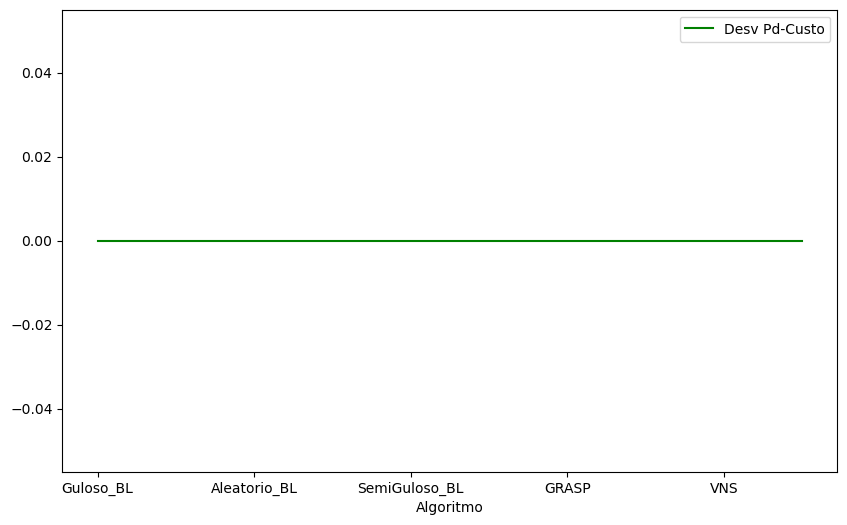

In [104]:
import matplotlib.pyplot as plt
#Coef VAR(%)-Custo	Desv Pd-Custo	Md Tempo	Coef VAR(%)-TEMPO	Desv Pd-TEMPO
df_kpf_1=df[df['Instancia']=='kpf_1']

ax = plt.gca()
#df_kpf_1.plot(kind='line', x='Algoritmo', y='Md Custo', color='blue', ax=ax, figsize=(10,6))
df_kpf_1.plot(kind='line', x='Algoritmo', y='Desv Pd-Custo', color='green', ax=ax, figsize=(10,6))
#df_kpf_1.plot(kind='line', x='Algoritmo', y='Coef VAR(%)-TEMPO', color='yellow', ax=ax, figsize=(10,6))


plt.show()



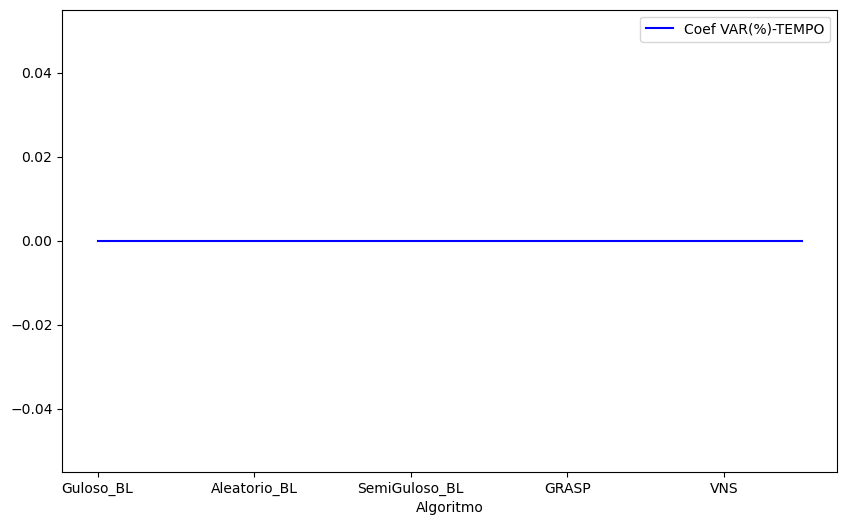

In [105]:
ax = plt.gca()
#df_kpf_1.plot(kind='line', x='Algoritmo', y='Md Tempo', color='blue', ax=ax, figsize=(10,6))
#df_kpf_1.plot(kind='line', x='Algoritmo', y='Desv Pd-Custo', color='green', ax=ax, figsize=(10,6))
df_kpf_1.plot(kind='line', x='Algoritmo', y='Coef VAR(%)-TEMPO', color='blue', ax=ax, figsize=(10,6))
plt.show()



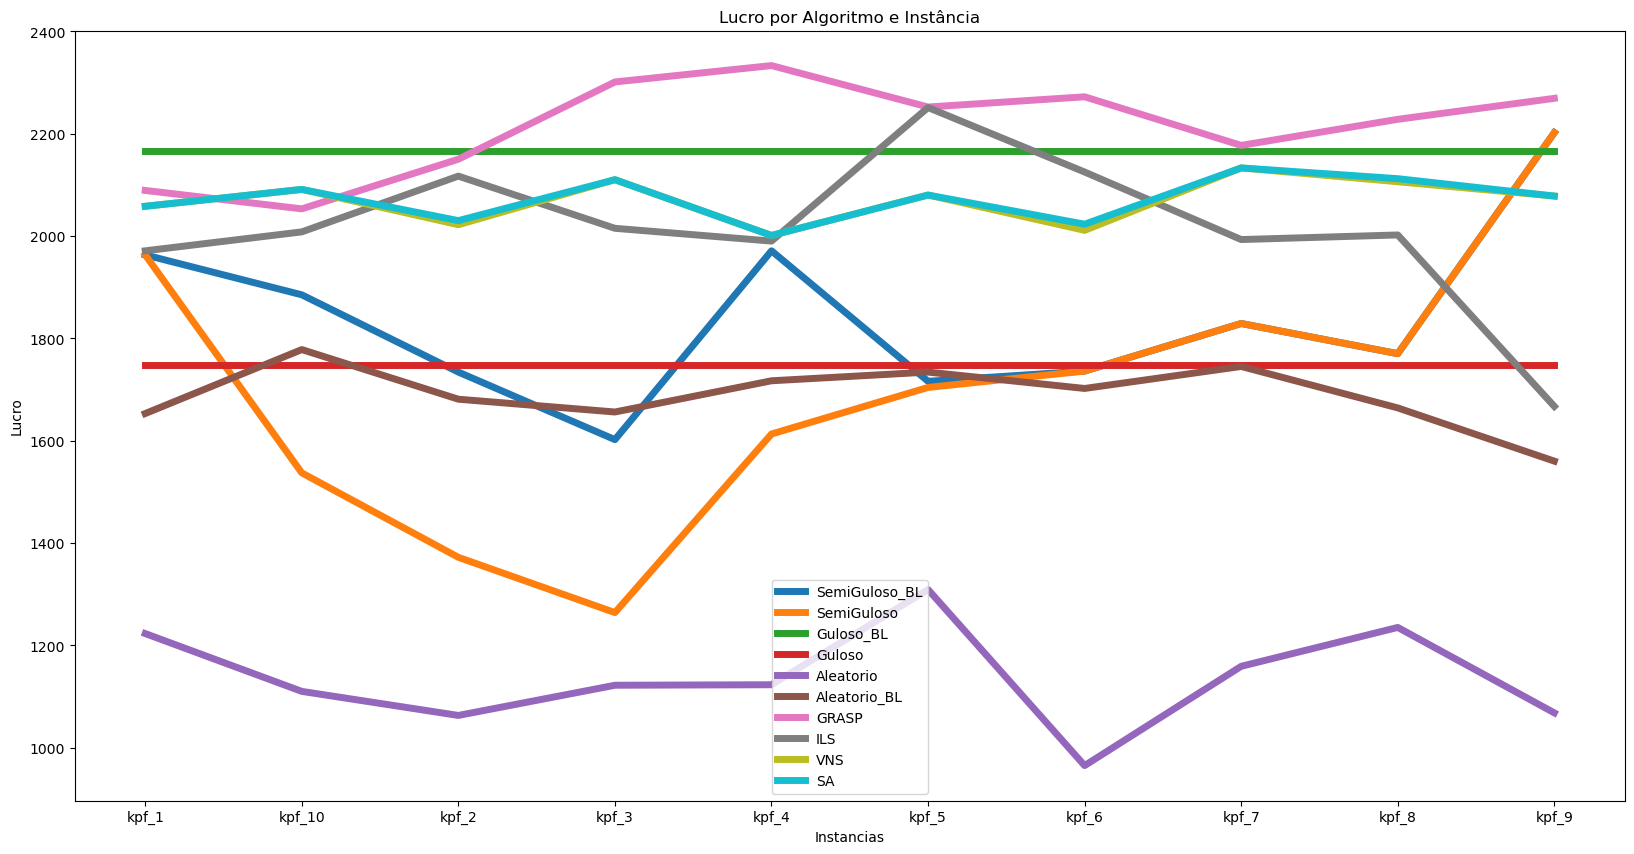

In [109]:

fig, ax = plt.subplots(figsize=(20, 10))
plt.rcParams['lines.linewidth'] = 5
ax.plot(df[df['Algoritmo']=='SemiGuloso_BL']['Instancia'], df[df['Algoritmo']=='SemiGuloso_BL']['Md Custo'], label='SemiGuloso_BL')
ax.plot(df[df['Algoritmo']=='SemiGuloso']['Instancia'], df[df['Algoritmo']=='SemiGuloso']['Md Custo'], label='SemiGuloso')
ax.plot(df[df['Algoritmo']=='Guloso_BL']['Instancia'], df[df['Algoritmo']=='Guloso_BL']['Md Custo'], label='Guloso_BL')
ax.plot(df[df['Algoritmo']=='Guloso']['Instancia'], df[df['Algoritmo']=='Guloso']['Md Custo'], label='Guloso')
ax.plot(df[df['Algoritmo']=='Aleatorio']['Instancia'], df[df['Algoritmo']=='Aleatorio']['Md Custo'], label='Aleatorio')
ax.plot(df[df['Algoritmo']=='Aleatorio_BL']['Instancia'], df[df['Algoritmo']=='Aleatorio_BL']['Md Custo'], label='Aleatorio_BL')
ax.plot(df[df['Algoritmo']=='GRASP']['Instancia'], df[df['Algoritmo']=='GRASP']['Md Custo'], label='GRASP')
ax.plot(df[df['Algoritmo']=='ILS']['Instancia'], df[df['Algoritmo']=='ILS']['Md Custo'], label='ILS')
ax.plot(df[df['Algoritmo']=='VNS']['Instancia'], df[df['Algoritmo']=='VNS']['Md Custo'], label='VNS')
ax.plot(df[df['Algoritmo']=='SA']['Instancia'], df[df['Algoritmo']=='SA']['Md Custo'], label='SA')
ax.set_xlabel('Instancias')
ax.set_ylabel('Lucro')
ax.set_title("Lucro por Algoritmo e Instância")
ax.legend()
plt.show()

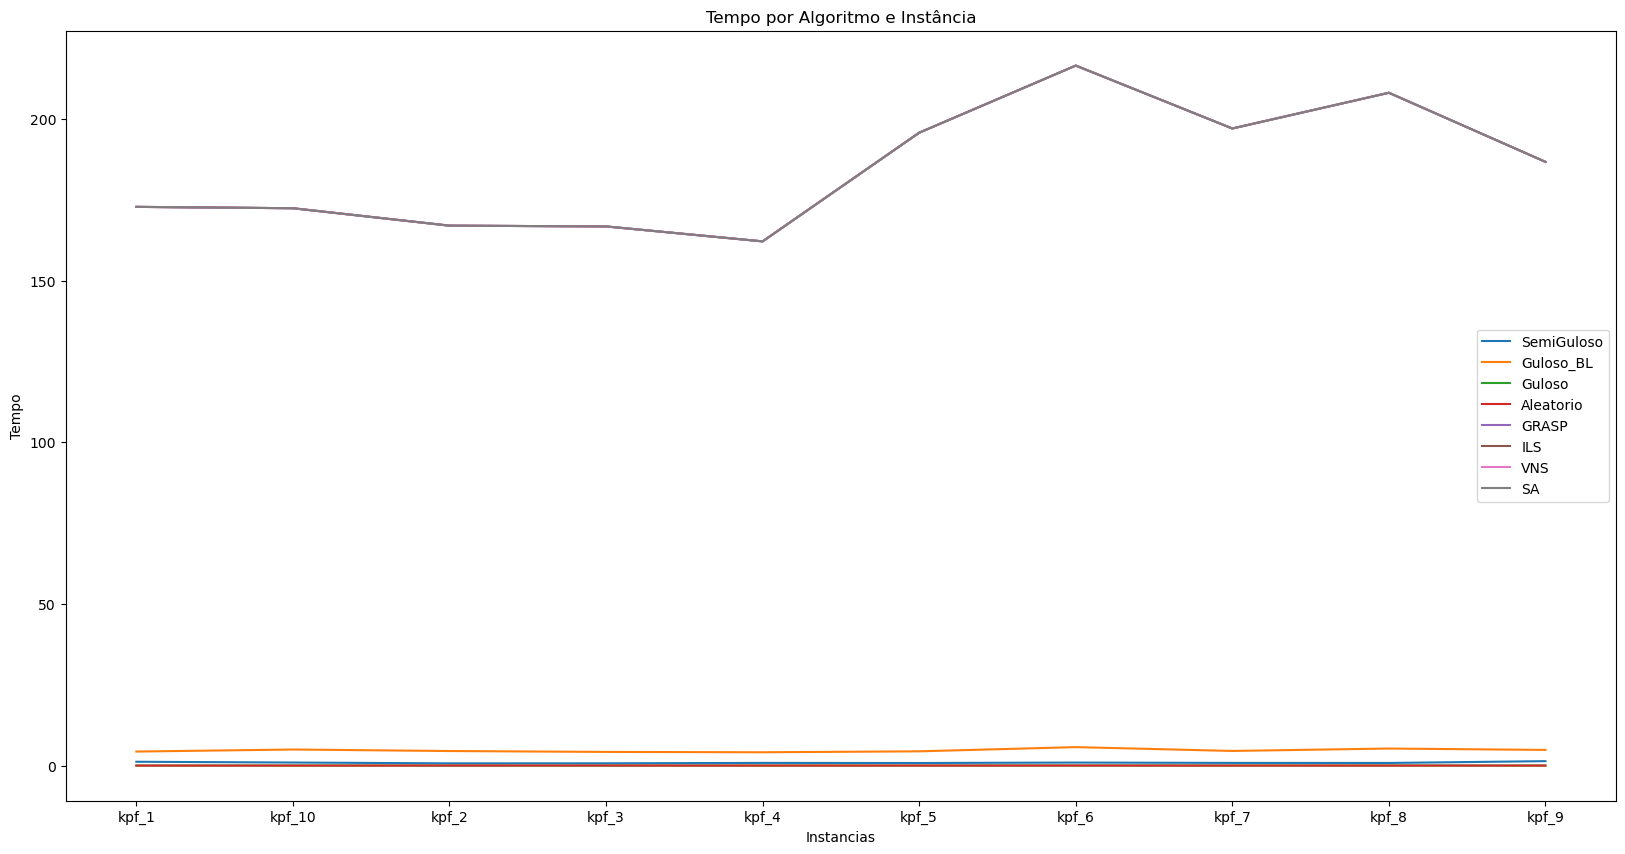

In [107]:
fig, ax = plt.subplots(figsize=(20, 10))
#ax.plot(df[df['Algoritmo']=='SemiGuloso_BL']['Instancia'], df[df['Algoritmo']=='SemiGuloso_BL']['Md Tempo'], label='SemiGuloso_BL')
ax.plot(df[df['Algoritmo']=='SemiGuloso']['Instancia'], df[df['Algoritmo']=='SemiGuloso']['Md Tempo'], label='SemiGuloso')
ax.plot(df[df['Algoritmo']=='Guloso_BL']['Instancia'], df[df['Algoritmo']=='Guloso_BL']['Md Tempo'], label='Guloso_BL')
ax.plot(df[df['Algoritmo']=='Guloso']['Instancia'], df[df['Algoritmo']=='Guloso']['Md Tempo'], label='Guloso')
ax.plot(df[df['Algoritmo']=='Aleatorio']['Instancia'], df[df['Algoritmo']=='Aleatorio']['Md Tempo'], label='Aleatorio')
ax.plot(df[df['Algoritmo']=='GRASP']['Instancia'], df[df['Algoritmo']=='GRASP']['Md Tempo'], label='GRASP')
ax.plot(df[df['Algoritmo']=='ILS']['Instancia'], df[df['Algoritmo']=='ILS']['Md Tempo'], label='ILS')
ax.plot(df[df['Algoritmo']=='VNS']['Instancia'], df[df['Algoritmo']=='VNS']['Md Tempo'], label='VNS')
ax.plot(df[df['Algoritmo']=='SA']['Instancia'], df[df['Algoritmo']=='SA']['Md Tempo'], label='SA')
#ax.plot(df[df['Algoritmo']=='Aleatorio_BL']['Instancia'], df[df['Algoritmo']=='Aleatorio_BL']['Md Tempo'], label='Aleatorio_BL')
ax.set_xlabel('Instancias')
ax.set_ylabel('Tempo')
ax.set_title("Tempo por Algoritmo e Instância")
ax.legend()
plt.show()

<AxesSubplot:xlabel='Algoritmo', ylabel='Md Tempo'>

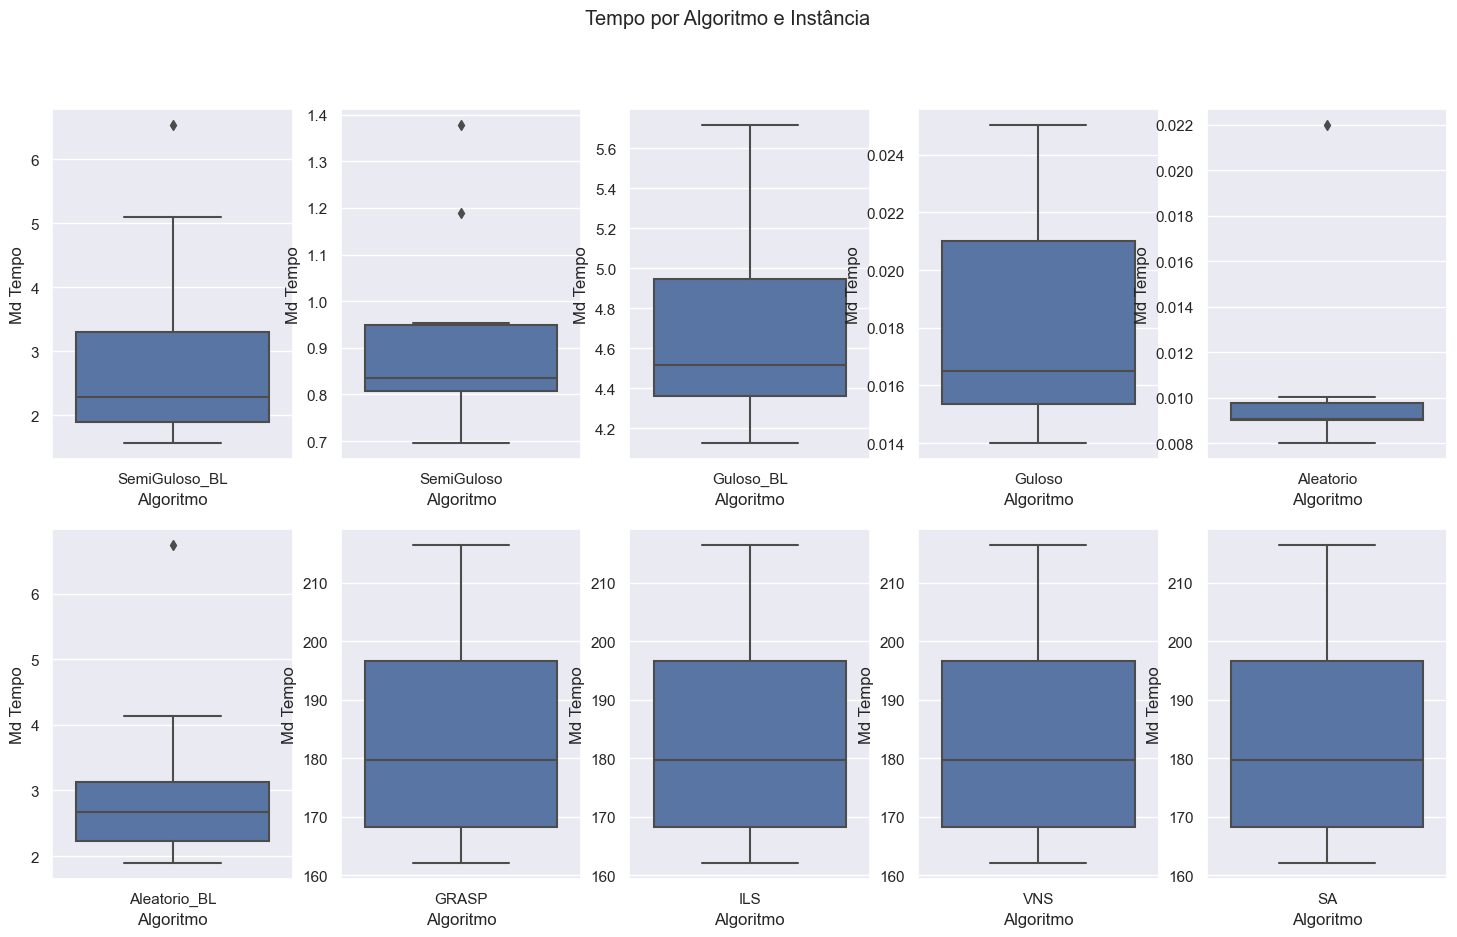

In [136]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set() # Setting seaborn as default style even if use only matplotlib

#fig, axes = plt.subplots(1, 2, figsize=(10, 10))
fig, axes = plt.subplots(2,5, figsize=(18, 10))

fig.suptitle('Tempo por Algoritmo e Instância')

#ax.plot(df[df['Algoritmo']=='SemiGuloso_BL']['Instancia'], df[df['Algoritmo']=='SemiGuloso_BL']['Md Custo'], label='SemiGuloso_BL')
#ax.plot(df[df['Algoritmo']=='SemiGuloso']['Instancia'], df[df['Algoritmo']=='SemiGuloso']['Md Custo'], label='SemiGuloso')
#ax.plot(df[df['Algoritmo']=='Guloso_BL']['Instancia'], df[df['Algoritmo']=='Guloso_BL']['Md Custo'], label='Guloso_BL')
#x.plot(df[df['Algoritmo']=='Guloso']['Instancia'], df[df['Algoritmo']=='Guloso']['Md Custo'], label='Guloso')
#ax.plot(df[df['Algoritmo']=='Aleatorio']['Instancia'], df[df['Algoritmo']=='Aleatorio']['Md Custo'], label='Aleatorio')
#ax.plot(df[df['Algoritmo']=='Aleatorio_BL']['Instancia'], df[df['Algoritmo']=='Aleatorio_BL']['Md Custo'], label='Aleatorio_BL')
#ax.plot(df[df['Algoritmo']=='GRASP']['Instancia'], df[df['Algoritmo']=='GRASP']['Md Custo'], label='GRASP')
#ax.plot(df[df['Algoritmo']=='ILS']['Instancia'], df[df['Algoritmo']=='ILS']['Md Custo'], label='ILS')
#ax.plot(df[df['Algoritmo']=='VNS']['Instancia'], df[df['Algoritmo']=='VNS']['Md Custo'], label='VNS')
#ax.plot(df[df['Algoritmo']=='SA']['Instancia'], df[df['Algoritmo']=='SA']['Md Custo'], label='SA')


#sns.boxplot(ax=axes[0], data=df[df['Algoritmo']=='SemiGuloso_BL'], x='Algoritmo', y='Md Tempo')
#sns.boxplot(ax=axes[1], data=df[df['Algoritmo']=='SemiGuloso'], x='Algoritmo', y='Md Tempo')
sns.boxplot(ax=axes[0, 0], data=df[df['Algoritmo']=='SemiGuloso_BL'], x='Algoritmo', y='Md Tempo')
sns.boxplot(ax=axes[0, 1], data=df[df['Algoritmo']=='SemiGuloso'], x='Algoritmo', y='Md Tempo')
sns.boxplot(ax=axes[0, 2], data=df[df['Algoritmo']=='Guloso_BL'], x='Algoritmo', y='Md Tempo')
sns.boxplot(ax=axes[0, 3], data=df[df['Algoritmo']=='Guloso'], x='Algoritmo', y='Md Tempo')
sns.boxplot(ax=axes[0, 4], data=df[df['Algoritmo']=='Aleatorio'], x='Algoritmo', y='Md Tempo')
sns.boxplot(ax=axes[1, 0], data=df[df['Algoritmo']=='Aleatorio_BL'], x='Algoritmo', y='Md Tempo')
sns.boxplot(ax=axes[1, 1], data=df[df['Algoritmo']=='GRASP'], x='Algoritmo', y='Md Tempo')
sns.boxplot(ax=axes[1, 2], data=df[df['Algoritmo']=='ILS'], x='Algoritmo', y='Md Tempo')
sns.boxplot(ax=axes[1, 3], data=df[df['Algoritmo']=='VNS'], x='Algoritmo', y='Md Tempo')
sns.boxplot(ax=axes[1, 4], data=df[df['Algoritmo']=='SA'], x='Algoritmo', y='Md Tempo')

In [115]:
#df[df['Algoritmo']=='SemiGuloso_BL']

,Algoritmo,Instancia,Md Custo,Coef VAR(%)-Custo,Desv Pd-Custo,Md Tempo,Coef VAR(%)-TEMPO,Desv Pd-TEMPO
4,SemiGuloso_BL,kpf_1,1963.0,0.0,0.0,2.331526,0.0,0.0
14,SemiGuloso_BL,kpf_10,1885.0,0.0,0.0,5.104099,0.0,0.0
24,SemiGuloso_BL,kpf_2,1734.0,0.0,0.0,2.684022,0.0,0.0
34,SemiGuloso_BL,kpf_3,1602.0,0.0,0.0,2.159249,0.0,0.0
44,SemiGuloso_BL,kpf_4,1971.0,0.0,0.0,6.540286,0.0,0.0
54,SemiGuloso_BL,kpf_5,1716.0,0.0,0.0,2.220312,0.0,0.0
64,SemiGuloso_BL,kpf_6,1736.0,0.0,0.0,1.793917,0.0,0.0
74,SemiGuloso_BL,kpf_7,1829.0,0.0,0.0,1.560486,0.0,0.0
84,SemiGuloso_BL,kpf_8,1770.0,0.0,0.0,1.730783,0.0,0.0
94,SemiGuloso_BL,kpf_9,2202.0,0.0,0.0,3.511001,0.0,0.0
